#### Prophet 사용이유
- LSTM은 평균화 경향으로 인해 직선 결과가 나왔고, 변동성을 강제로 추가해야 했음으로 자연스러운 패턴 만들기 어려움
- Prophet은 이러한 문제를 해결하기 위해 설계됨
- Prophet은 주가의 장기 트렌드(상승/하락 경향)와 계절성(주기적 패턴)을 자동으로 학습해 더 자연스러운 예측기대

06:39:26 - cmdstanpy - INFO - Chain [1] start processing
06:39:26 - cmdstanpy - INFO - Chain [1] done processing


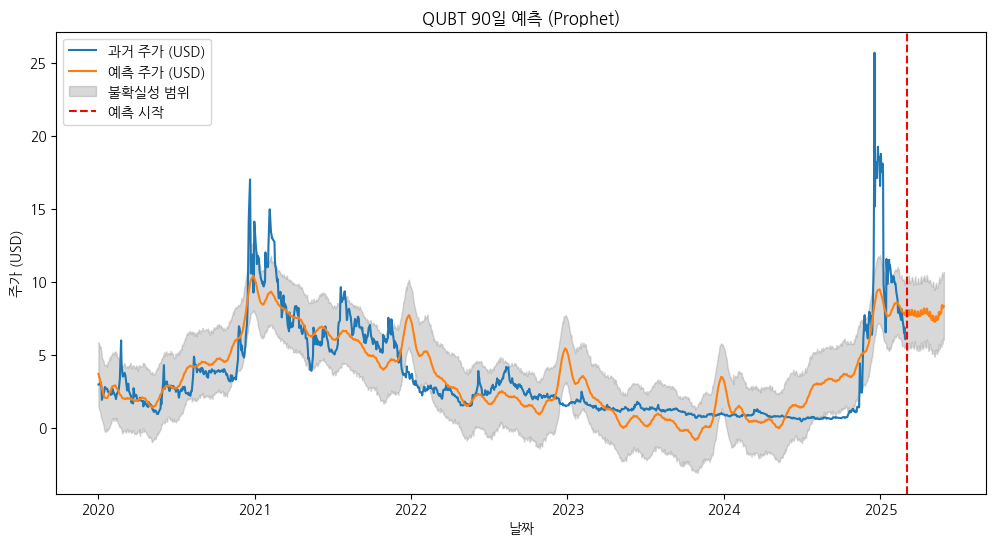

             ds      yhat  yhat_lower  yhat_upper
1382 2025-05-25  8.404792    5.998881   10.621717
1383 2025-05-26  8.185857    5.737853   10.402032
1384 2025-05-27  8.231904    6.004004   10.461052
1385 2025-05-28  8.256209    6.164995   10.596995
1386 2025-05-29  8.320176    6.025199   10.668539


In [3]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 주가 데이터 가져오기
stock = yf.Ticker("QUBT")
data = stock.history(start="2020-01-01", end="2025-03-03")

# Prophet에 맞게 데이터 준비
prophet_data = data[['Close']].reset_index()
prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# 타임존 제거
prophet_data['ds'] = prophet_data['ds'].dt.tz_localize(None)

# Prophet 모델 학습
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(prophet_data)

# 미래 90일 예측
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label="과거 주가 (USD)")
plt.plot(forecast['ds'], forecast['yhat'], label="예측 주가 (USD)")
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3, label="불확실성 범위")
plt.axvline(x=pd.to_datetime("2025-03-03"), color='r', linestyle='--', label="예측 시작")
plt.title("QUBT 90일 예측 (Prophet)")
plt.xlabel("날짜")
plt.ylabel("주가 (USD)")
plt.legend()
plt.show()

# 예측값 출력
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

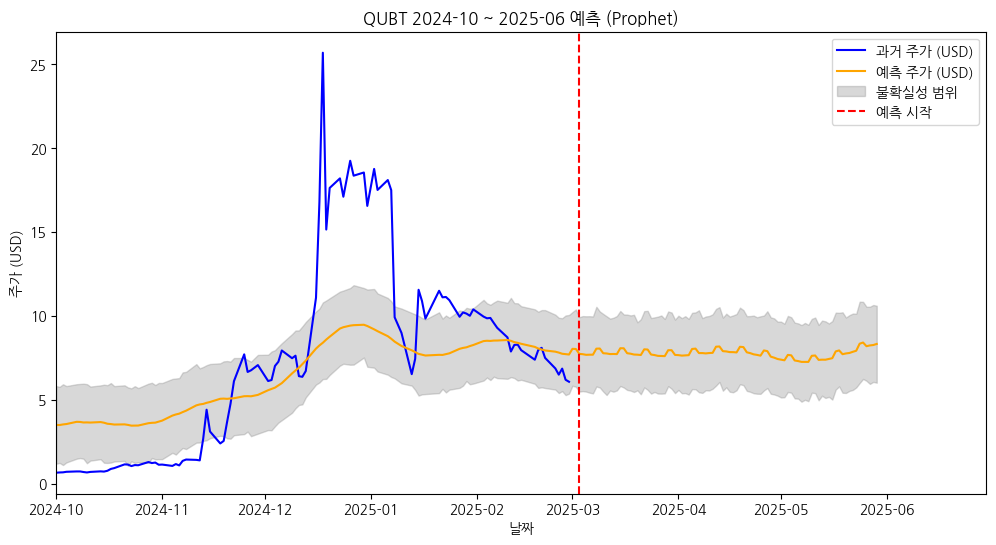

             ds      yhat  yhat_lower  yhat_upper
1194 2024-10-01  3.491752    1.178846    5.809894
1195 2024-10-02  3.486993    1.229226    5.760901
1196 2024-10-03  3.522437    1.103222    5.916119
1197 2024-10-04  3.546232    1.257275    5.809023
1198 2024-10-07  3.678417    1.479726    5.920762
...         ...       ...         ...         ...
1382 2025-05-25  8.404792    6.233774   10.830918
1383 2025-05-26  8.185857    6.124364   10.535817
1384 2025-05-27  8.231904    5.938768   10.538890
1385 2025-05-28  8.256209    6.059664   10.642106
1386 2025-05-29  8.320176    6.009569   10.595688

[193 rows x 4 columns]


In [6]:
# 2024-10-01 ~ 2025-06-30 기간 필터링
start_date = pd.to_datetime('2024-10-01')
end_date = pd.to_datetime('2025-06-30')
mask = (forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)
forecast_filtered = forecast[mask]

# 과거 데이터 필터링
past_mask = (prophet_data['ds'] >= start_date) & (prophet_data['ds'] <= end_date)
prophet_data_filtered = prophet_data[past_mask]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(prophet_data_filtered['ds'], prophet_data_filtered['y'], label="과거 주가 (USD)", color='blue')
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label="예측 주가 (USD)", color='orange')
plt.fill_between(forecast_filtered['ds'], forecast_filtered['yhat_lower'], forecast_filtered['yhat_upper'], 
                 color='gray', alpha=0.3, label="불확실성 범위")
plt.axvline(x=pd.to_datetime("2025-03-03"), color='r', linestyle='--', label="예측 시작")
plt.xlim(start_date, end_date)
plt.title("QUBT 2024-10 ~ 2025-06 예측 (Prophet)")
plt.xlabel("날짜")
plt.ylabel("주가 (USD)")
plt.legend()
plt.show()

# 예측값 출력
print(forecast_filtered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])